# Dataset Story

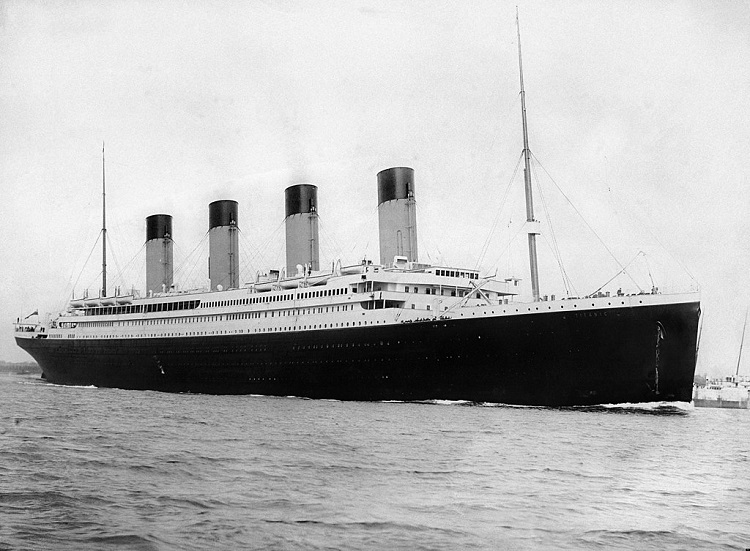

RMS Titanic was an Olympic-class transatlantic cruise ship owned by White Star Line. Manufactured at the Harland and Wolff (Belfast, Ireland) shipyards. On the night of April 15, 1912, it hit an iceberg on its first voyage and sank into the icy waters of the North Atlantic in about two hours and forty minutes. When its construction was completed in 1912, it was the largest steam passenger ship in the world. Its sinking resulted in the deaths of 1,514 people and went down in history as one of the greatest maritime disasters.

The great loss of life caused by the sinking of the Titanic was attributed to many reasons, but the fact that stood out over time was that the ship did not carry enough lifeboats for everyone. Although the full capacity of the Titanic was 3,547 people, the total capacity of the lifeboats on board was 1,178 people. **Also, the number of men who died in total was very inproportionate because they prioritized women and children during the accident** 

<a href="https://tr.wikipedia.org/wiki/RMS_Titanic">References</a>

# Loading Related Libraries 

In [571]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import  Image
from warnings import filterwarnings
filterwarnings('ignore')

# Dataset Display Settings 

In [572]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format', lambda x:'%.3f' % x)
pd.set_option('display.width',500)

# Let's Get To Know The Dataset

In [573]:
import pandas as pd

In [574]:
df_=pd.read_csv('titanic.csv')

In [575]:
df=df_.copy()

In [576]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
274,275,1,3,"Healy, Miss. Hanora ""Nora""",female,NaN,0,0,370375,7.750,NaN,Q
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.550,NaN,S
627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.000,0,0,13502,77.958,D9,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.000,1,1,PP 9549,16.700,G6,S
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.000,2,0,345764,18.000,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.458,NaN,Q
707,708,1,1,"Calderhead, Mr. Edward Pennington",male,42.000,0,0,PC 17476,26.288,E24,S
775,776,0,3,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",male,18.000,0,0,347078,7.750,NaN,S
80,81,0,3,"Waelens, Mr. Achille",male,22.000,0,0,345767,9.000,NaN,S
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.050,NaN,S


### About The Dataset 

In [577]:
print("The dataset has {} rows and {} columns.".format(df.shape[0],df.shape[1]),end="\n\n")
print("Names of variables in the dataset:" )
for col in df.columns:
      print(col,end="  ")
print(end="\n\n")
print("Index information in the dataset:" )
print(df.index,end="\n\n")
print("Data type of variables in dataset :")
print(df.dtypes,end="\n\n")
print("Missing values of variables in the dataset: ")
print(df.isnull().sum(),end="\n\n")
print("The total number of missing values in the dataset: ")
print(df.isnull().sum().sum(),end="\n\n")
print("Memory usage of label values (index/columns) in the dataset: " )
print(df.memory_usage())

The dataset has 891 rows and 12 columns.

Names of variables in the dataset:
PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  Cabin  Embarked  

Index information in the dataset:
RangeIndex(start=0, stop=891, step=1)

Data type of variables in dataset :
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Missing values of variables in the dataset: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The total number of missing values in the dataset: 
866

Memory usage of label values (index/columns) in the dataset: 
Index           128
Pas

# Let's Get to Know the Variables 

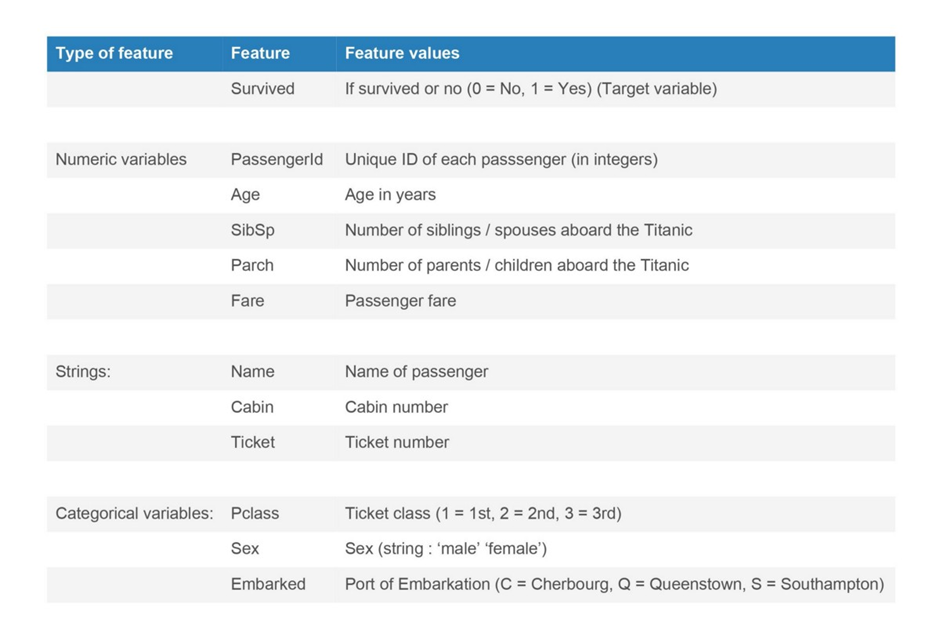

### Variables Classification

In [579]:
def grab_col_names(dataframe,cat_th=10,car_th=20):
    #Categorical Veriables
    cat_cols     =[i for i in df.columns if df[i].dtypes=='O']
    num_but_cat  =[i for i in df.columns if df[i].dtypes!='O' and df[i].nunique()<cat_th]
    cat_but_car  =[i for i in df.columns if df[i].dtypes=='O' and df[i].nunique()>car_th]
    cat_cols     =cat_cols+num_but_cat
    cat_cols     =[i for i in cat_cols if i not in cat_but_car]
    
    #Continuous Veriables
    num_cols=[i for i in df.columns if df[i].dtypes!='O']
    num_cols=[i for i in num_cols if i not in num_but_cat]
    
    print('Number of Observations : {}'.format(dataframe.shape[0]))
    print('Number of Variables    : {}'.format(dataframe.shape[1]))
    print('Number of Categorical Variables : {}'.format(len(cat_cols)))
    print('Number of Numerical Variables : {}'.format(len(num_cols)))
    print('Number of Numerical but Categorical Variables : {}'.format(len(num_but_cat)))
    print('Number of Categorical but Cardinal Variables : {}'.format(len(cat_but_car)))
    
    return cat_cols,num_cols,cat_but_car
    

In [580]:
cat_cols,num_cols,cat_but_car=grab_col_names(df)
print(end='\n\n')
print('Categorical Veriables          :',cat_cols,end='\n\n')
print('Continuous  Veriables          :',num_cols,end='\n\n')
print('Categorical but Cardinal Veriables :',cat_but_car,end='\n\n')


Number of Observations : 891
Number of Variables    : 12
Number of Categorical Variables : 6
Number of Numerical Variables : 3
Number of Numerical but Categorical Variables : 4
Number of Categorical but Cardinal Variables : 3


Categorical Veriables          : ['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

Continuous  Veriables          : ['PassengerId', 'Age', 'Fare']

Categorical but Cardinal Veriables : ['Name', 'Ticket', 'Cabin']



PassengerId is a continuous/numeric variable but acts like an index. 

In [581]:
num_cols=[i for i in num_cols if i!='PassengerId']
num_cols

['Age', 'Fare']

#### Let's Examine Categorical Variables 

In [582]:
for i in cat_cols:
    print('Unique Class Number of '+i+': '+str(df[i].nunique()))

Unique Class Number of Sex: 2
Unique Class Number of Embarked: 3
Unique Class Number of Survived: 2
Unique Class Number of Pclass: 3
Unique Class Number of SibSp: 7
Unique Class Number of Parch: 7


Categorical Veriables :  Sex

male      577
female    314
Name: Sex, dtype: int64



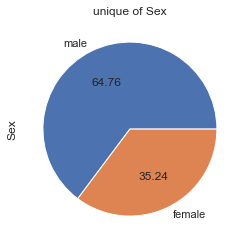

Categorical Veriables :  Embarked

S    644
C    168
Q     77
Name: Embarked, dtype: int64



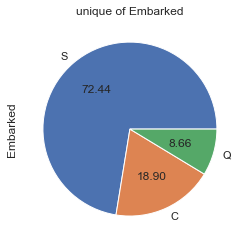

Categorical Veriables :  Survived

0    549
1    342
Name: Survived, dtype: int64



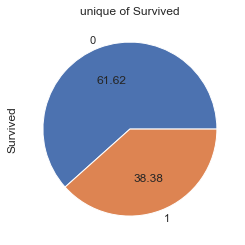

Categorical Veriables :  Pclass

3    491
1    216
2    184
Name: Pclass, dtype: int64



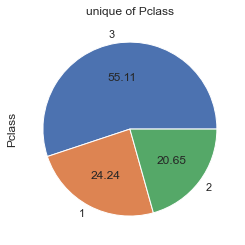

Categorical Veriables :  SibSp

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64



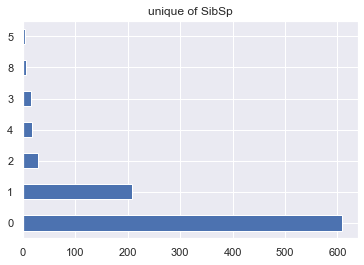

Categorical Veriables :  Parch

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64



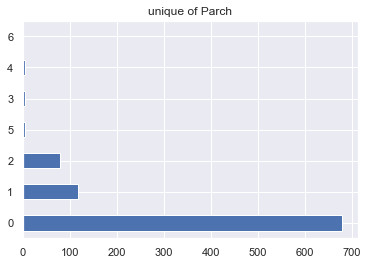

In [583]:
for i in cat_cols:
    if df[i].nunique()<5:
        print('Categorical Veriables : ', i,end='\n\n')
        print(df[i].value_counts(),end='\n\n')
        df[i].value_counts().plot(kind='pie',y='points',autopct='%.2f',title='unique of '+ i)
        plt.show()
    else:
        print('Categorical Veriables : ', i,end='\n\n')
        print(df[i].value_counts(),end='\n\n')
        df[i].value_counts().plot(kind='barh',title='unique of '+ i)
        plt.show()
        

#### Let's Review Continuous/Numerical Variables

In [584]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,714.000,29.699,14.526,0.420,20.125,28.000,38.000,80.000
Fare,891.000,32.204,49.693,0.000,7.910,14.454,31.000,512.329


In Dataset
- The state of being a minimum age of 0 to 1  <br>
- The condition that the minimum value of the ticket price is zero

let's analyze. 

##### Age

Observation units between 0 and 1 year old 

In [585]:
sorted(df.loc[df['Age']<1,'Age'])

[0.42, 0.67, 0.75, 0.75, 0.83, 0.83, 0.92]

Observation units with float data type in the 0-1 age range express the age of a newborn baby. 

Number of days since birthday / 365

##### Fare

- The condition that the minimum value of the ticket price is zero
    - Zero means missing observation unit, maybe.
    - It could be a gift, a promotion, a free ticket, or they disregarded the ship's             security and boarded the ship illegally. 

In [586]:
print('Number of missing observation units in ticket variable : ',df['Ticket'].isnull().sum()) 

Number of missing observation units in ticket variable :  0


In [587]:
non_paying_passengers=df.loc[df['Fare']==0]
non_paying_passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.000,0,0,LINE,0.000,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.000,0,0,112059,0.000,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000,0,0,LINE,0.000,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.000,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000,0,0,LINE,0.000,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.000,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.000,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.000,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.000,0,0,LINE,0.000,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.000,NaN,S


In [588]:
print('If the price paid for the ticket is zero :',end='\n\n') 
print('The passengers have boarded the ship from Southampton Harbor.',end='\n\n')
print([str(df.loc[index,'SibSp']+df.loc[index,'Parch']) \
for index,i in enumerate(df['Fare']) if i==0])
print('Passengers are lonely individuals.',end='\n\n') 
print('Each of the passengers has a male gender.',end='\n\n\n')
print(non_paying_passengers.groupby('Pclass',dropna=False)['Age'].count(),end='\n\n')
print('Passengers with ticket class 2 are not known for their age.')

If the price paid for the ticket is zero :

The passengers have boarded the ship from Southampton Harbor.

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
Passengers are lonely individuals.

Each of the passengers has a male gender.


Pclass
1    3
2    0
3    4
Name: Age, dtype: int64

Passengers with ticket class 2 are not known for their age.


In [589]:
non_paying_passengers.groupby(['Pclass','Ticket']).agg({'PassengerId':['count']})

PassengerId
                    count
Pclass Ticket            
1      112050           1
       112052           1
       112058           1
       112059           1
       19972            1
2      239853           3
       239854           1
       239855           1
       239856           1
3      LINE             4

In [590]:
non_paying_passengers.groupby('Pclass',dropna=False)['Age'].count()

Pclass
1    3
2    0
3    4
Name: Age, dtype: int64

As a result
- If the price paid for the ticket is zero 
    - It does not represent missing observation units. 
    - It could be a gift, a promotion, a free ticket, or they disregarded the ship's security and boarded the ship illegally. 
     
     
It cannot be ruled out that there are passengers with the same ticket number and all passengers embark from the same port. 
It can be commented that, with the possibility that a certain number of promotional tickets were distributed according to the ticket grade, the age of the passengers included in the ticket class number two is not known, creating a false identity and ignoring the ship security. 

#### Let's Examine the Target/Dependent/Output Variable 

##### Target Variable by Category Variables

In [591]:
cat_cols

['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

Sex
female   0.742
male     0.189
Name: Survived, dtype: float64



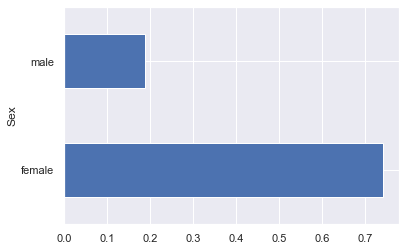

Embarked
C   0.554
Q   0.390
S   0.337
Name: Survived, dtype: float64



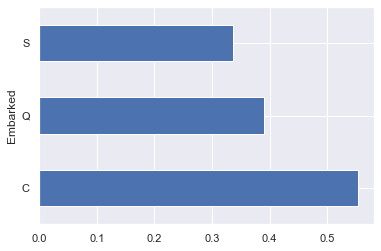

Pclass
1   0.630
2   0.473
3   0.242
Name: Survived, dtype: float64



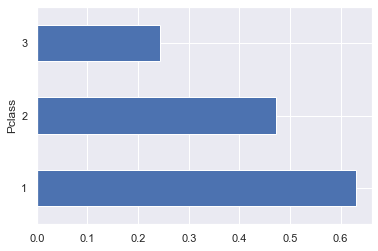

SibSp
0   0.345
1   0.536
2   0.464
3   0.250
4   0.167
5   0.000
8   0.000
Name: Survived, dtype: float64



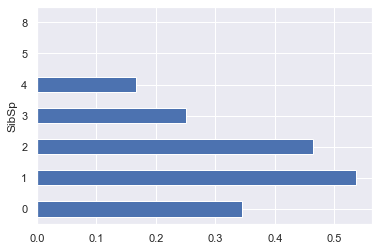

Parch
0   0.344
1   0.551
2   0.500
3   0.600
4   0.000
5   0.200
6   0.000
Name: Survived, dtype: float64



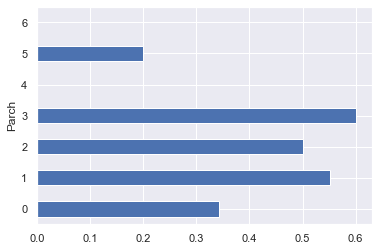

In [592]:
for i in cat_cols:
    if i!='Survived':
        print(df.groupby(i)['Survived'].mean(),end='\n\n')
        df.groupby(i)['Survived'].mean().plot(kind='barh')
        plt.show()

- Those who are females have a higher survival rate. 
- The order of survival according to the ports on board the ship
    - Cherbourg >  Queenstown >  Southampton
- Survival by category of tickets
    - 1>2>3

# Correlation Analysis 

<AxesSubplot:>

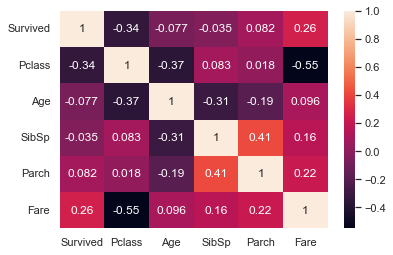

In [593]:
sns.heatmap(df.drop(columns=['PassengerId']).corr(),annot=True)

In [594]:
df.drop(columns=['PassengerId']).corr()['Survived'].nlargest(len(df.columns))[1:]

Fare      0.257
Parch     0.082
SibSp    -0.035
Age      -0.077
Pclass   -0.338
Name: Survived, dtype: float64

Hedef degisken --> by Survived<br>
   - There is a direct proportionality between the Fare and Parch variables. .
   - There is an inverse proportion between the SibSp -Age- Pclass variables. 

# Missing Observation Units Analysis

In [595]:
print('Total number of missing observation units in the dataset : ', df.isnull().sum().sum(),end='\n\n')

Total number of missing observation units in the dataset :  866



In [596]:
NaN_cols={i:[df[i].isnull().sum(),np.round((df[i].isnull().sum()/df.shape[0])*100, 2)] \
              for i in df.columns if df[i].isnull().sum()!=0}
print(NaN_cols,end='\n\n')
missing_values_df=pd.DataFrame(data=NaN_cols.values(),columns=['NaN_Count','Ratio'],index=NaN_cols.keys())
missing_values_df

{'Age': [177, 19.87], 'Cabin': [687, 77.1], 'Embarked': [2, 0.22]}



,NaN_Count,Ratio
Age,177,19.870
Cabin,687,77.100
Embarked,2,0.220


### Accessing Missing Observation Units

In [597]:
NaN_index=df.loc[df[list(NaN_cols.keys())].isnull().any(axis=1)].index
df.loc[df[list(NaN_cols.keys())].isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.458,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000,3,1,349909,21.075,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000,0,2,347742,11.133,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000,1,0,237736,30.071,NaN,C
12,13,0,3,"Saundercock, Mr. William Henry",male,20.000,0,0,A/5. 2151,8.050,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.000,1,5,347082,31.275,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.000,0,0,350406,7.854,NaN,S


### Solve The Missing Observation Unit Problem 

- Dropping
- Filling with a statistical metric or filling by categorical breakdown 
- Filling with predictive Assignment

The number of missing observations in the Age variable is approximately one-fifth of the dataset. The number of missing observations in the Cabine variable is approximately four-fifth of the dataset. The number of missing observations in the imbarked variable is approximately two-thousandths of the dataset.

if
 
   - Dropping method <br>
   
     It causes a huge data loss in the dataset. 
  
   - Method of filling with a statistical metric <br>
   
     Since the standard deviation (std) of the age variable is high, filling with the            median instead of the mean is a reliable method and does not cause any bias. 

   - Fill with predictive assignment <br>
   
     With the KNN imputer, the average of the closest neighbor observation units to the          missing observation units is taken and assigned to the missing observation unit. Since      KNN imputer has a distance/distance-based algorithm, it is also of great importance to      eliminate the missing observation unit problem in regression problems and some              classification problems. However, since the number of missing observation units in the      current variables is high, the nearest neighbor selections are likely to be made            incorrectly, so I will not prefer its use in the titanic data set.

##### Cabin

Because Cabin, which is a categorical and Cardinal variable, has a large number of unique classes and the ratio of missing observation units to total observation units is high, it is a logical decision to remove/delete/drop Cabin Variable from the data set.

If a significant variable is obtained for the target variable after the Cabin variable is converted to a bool categorical variable, it should be deleted after the Feature Engineering phase is completed. 

In [598]:
df.groupby(df['Cabin'].notnull().astype('int'))['Survived'].mean()

Cabin
0   0.300
1   0.667
Name: Survived, dtype: float64

When the Cabin variable is converted to a binary variable, it becomes meaningful for the target variable, so it should be deleted after it is converted to a new variable in the Feature Engineering stage. 

##### Age 

In [599]:
df['Age'].agg(['min','mean','median','std','max'])

min       0.420
mean     29.699
median   28.000
std      14.526
max      80.000
Name: Age, dtype: float64

It would be correct to fill the observation units of the variable Age, which is a continuous variable, with a statistical metric.

Standard deviation is 14 and Age is a high ratio since it has values between 0 and 80. Therefore, filling with median should be preferred instead of filling with mean. 

In [600]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [601]:
print('Number of missing observation units in ticket variable : ',df['Age'].isnull().sum()) 

Number of missing observation units in ticket variable :  0


##### Embarked 

The ratio of missing observation units to the total observation units is two per thousand. 
- Missing observation units can be dropped with the drop method. 
- Since it is a categorical variable, missing observation units can be filled according to the most repeated unique class with the fillna method. 

In [602]:
df.loc[df['Embarked'].isnull()].any(axis=1)

61     True
829    True
dtype: bool

In [603]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [604]:
print('Number of missing observation units in ticket variable : ',df['Embarked'].isnull().sum()) 

Number of missing observation units in ticket variable :  0


# Reviewing Observation Units

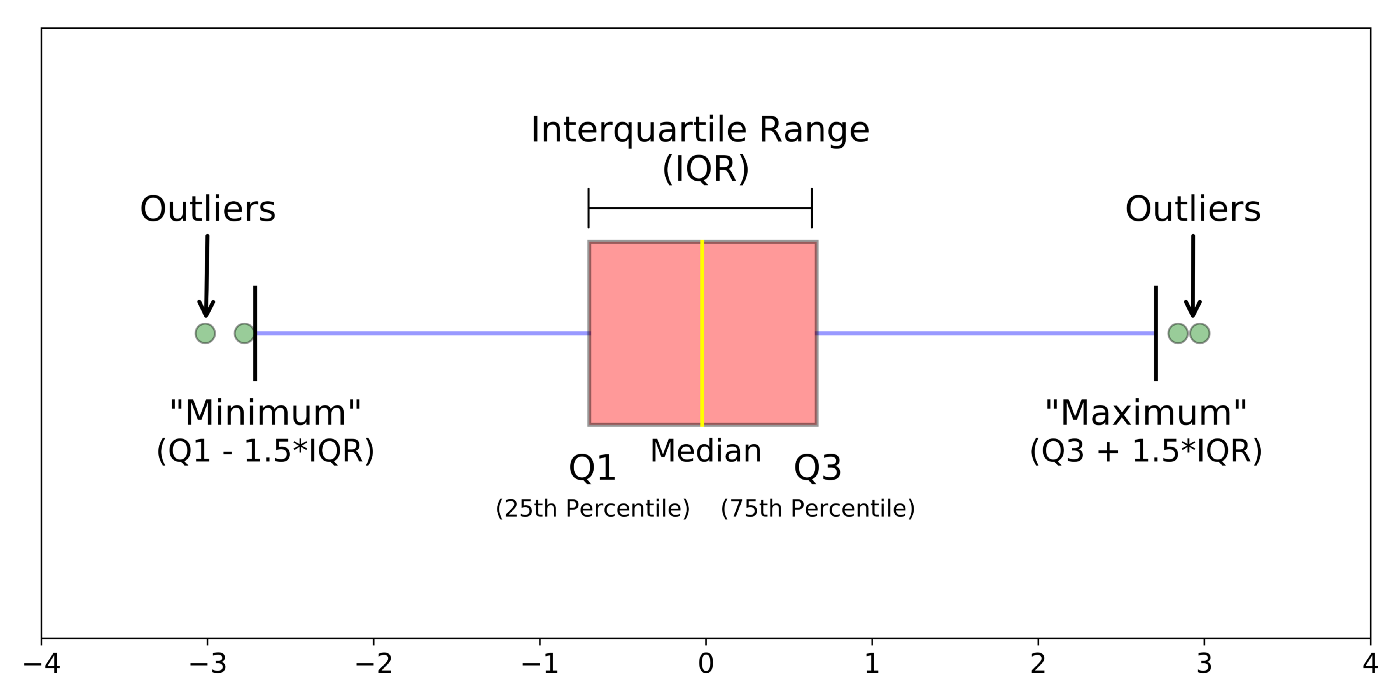

In [605]:
Image('box-plot.png')

### Calculating Threshold Values for Outlier Observations as Lower Limit and Upper Limit 

In [606]:
def outlier_thresholds(dataframe,col,q1=0.05,q3=0.95):
    quartile1=dataframe[col].quantile(q1)
    quartile3=dataframe[col].quantile(q3)
    inter_quartile_range=quartile3-quartile1
    down_limit=quartile1-(1.5*inter_quartile_range)
    up_limit=quartile3+(1.5*inter_quartile_range)
    
    return down_limit,up_limit

In [607]:
for i in num_cols:
    print(i+":"+str(outlier_thresholds(df,i)))

Age:(-66.0, 126.0)
Fare:(-150.056225, 269.360375)


### Detecting the Presence of Outlier Observation Units

In [608]:
def check_outlier(dataframe,col):
    down_limit,up_limit=outlier_thresholds(dataframe,col)
    if dataframe[((dataframe[col]<down_limit) | (dataframe[col]>up_limit))].any(axis=None):
        return True
    else:
        return False

In [609]:
for i in num_cols:
    print(i+":"+str(check_outlier(df,i)))

Age:False
Fare:True


### Accessing The Index Information Of Outlier Observation Units 

In [610]:
def grab_outliers(dataframe,col,table=False,index=False):
    down,up=outlier_thresholds(dataframe,col)
    if table:
        if dataframe[((dataframe[col]<down) | (dataframe[col]>up))].any(axis=None):
            print(dataframe[((dataframe[col]<down) | (dataframe[col]>up))])
    if index:
        outliers_index=dataframe[((dataframe[col]<down) | (dataframe[col]>up))].index
        return outliers_index

In [611]:
for i in num_cols:
    print(i+": "+str(grab_outliers(df,i,False,True)),end='\n\n\n')
    outliers_index=grab_outliers(df,i,False,True)
    print("Outliers :"+"\n"+str(df[i][outliers_index]),end='\n\n\n')
                       

Age: Int64Index([], dtype='int64')


Outliers :
Series([], Name: Age, dtype: float64)


Fare: Int64Index([258, 679, 737], dtype='int64')


Outliers :
258   512.329
679   512.329
737   512.329
Name: Fare, dtype: float64




### Solving Outlier Observation Units Problems 

Outlier Observation Units: 
   - It is deleted from the data set with the drop method 
   - It is reassigned to the nearest threshold. 

### Re-assignment with Tresholds

In [612]:
def replace_with_thresholds(dataframe,col):
    down_limit,up_limit=outlier_thresholds(dataframe,col)
    dataframe.loc[(dataframe[col]<down_limit),col]=down_limit
    dataframe.loc[(dataframe[col]>up_limit),col]=up_limit

In [613]:
for i in num_cols:
    replace_with_thresholds(df,i)

In [614]:
for i in num_cols:
    print(i+":"+str(check_outlier(df,i)))

Age:False
Fare:False


# Feature Engineering

### Creating new variables from Carnival variables 

In [615]:
cat_but_car

['Name', 'Ticket', 'Cabin']

#### Name

##### Letter_Count

The names of the passengers can give us information about their ethnic origin and financial situation. 

- Gender - Name Length 
- Port of embarkation - Name length 
- Number of Family - Name Length 

In [616]:
df.loc[:,'Letter_Count']=df['Name'].apply(lambda x:len(x))

In [617]:
df.groupby('Embarked')['Letter_Count','Survived'].mean()

,Letter_Count,Survived
Embarked,,
C,27.494,0.554
Q,22.714,0.390
S,27.334,0.339


In [618]:
df.groupby('Sex')['Letter_Count','Survived'].mean()

,Letter_Count,Survived
Sex,,
female,32.608,0.742
male,23.894,0.189


##### Word_Count

In [619]:
df.loc[:,'Word_Count']=df['Name'].apply(lambda x:len(x.split(' ')))

##### Adjective 

Labels that individuals have can also be an important factor in terms of survival. 

In [620]:
adjective=set()
for i in df['Name']:
    for j in i.split(' '):
        if '.' in j:
            adjective.add(j)
adjective

{'Capt.',
 'Col.',
 'Countess.',
 'Don.',
 'Dr.',
 'Jonkheer.',
 'L.',
 'Lady.',
 'Major.',
 'Master.',
 'Miss.',
 'Mlle.',
 'Mme.',
 'Mr.',
 'Mrs.',
 'Ms.',
 'Rev.',
 'Sir.'}

In [621]:
for index,i in enumerate(df['Name']):
    for j in i.split(' '):
        if j in adjective :
            df.loc[index,'Adjective']=j         

In [622]:
df.groupby('Adjective')['Survived'].mean()

Adjective
Capt.       0.000
Col.        0.500
Countess.   1.000
Don.        0.000
Dr.         0.429
Jonkheer.   0.000
L.          1.000
Lady.       1.000
Major.      0.500
Master.     0.575
Miss.       0.698
Mlle.       1.000
Mme.        1.000
Mr.         0.157
Mrs.        0.790
Ms.         1.000
Rev.        0.000
Sir.        1.000
Name: Survived, dtype: float64

#### Cabin 

##### Binary_Cabin

In [623]:
df.groupby(df['Cabin'].notnull().astype('int'))['Survived'].mean()

Cabin
0   0.300
1   0.667
Name: Survived, dtype: float64

In [624]:
df['Binary_Cabin']=df['Cabin'].notnull().astype('int')

In [625]:
df['Binary_Cabin'].value_counts()

0    687
1    204
Name: Binary_Cabin, dtype: int64

In [626]:
df.drop(columns=['Cabin'],inplace=True)

##### Ticket 

In [627]:
df.groupby('Ticket')['PassengerId'].count()

Ticket
110152                3
110413                3
110465                2
110564                1
110813                1
111240                1
111320                1
111361                2
111369                1
111426                1
111427                1
111428                1
112050                1
112052                1
112053                1
112058                1
112059                1
112277                1
112379                1
113028                1
113043                1
113050                1
113051                1
113055                1
113056                1
113059                1
113501                1
113503                1
113505                2
113509                1
113510                1
113514                1
113572                2
113760                4
113767                1
113773                1
113776                2
113781                4
113783                1
113784                1
113786                1
113787   

There are many passengers with the same ticket tag. Tickets are cut after a single transaction and their tags are unique, so a ticket represents a group and is charged according to the number of people. 

In [628]:
df.groupby('Ticket')['PassengerId'].count().agg(['min','max'])

min    1
max    7
Name: PassengerId, dtype: int64

##### Group_Size

In [629]:
unique_group=df.groupby('Ticket')['PassengerId'].count()

In [630]:
unique_group=dict(unique_group)

In [631]:
df['Group_Size']=0
for i in df['Ticket']:
    if i in unique_group:
        df.loc[(df['Ticket']==i),'Group_Size']=unique_group[i]
          

##### Categorical_Group

In [632]:
for i in (df['Group_Size']):
    if i==1:
        df.loc[df['Group_Size']==i,'Categorical_Group']='Alone'
    if i!=1:
        df.loc[df['Group_Size']==i,'Categorical_Group']=str(i)+'_'+'Passenger'

2_Passenger    188
3_Passenger     63
4_Passenger     44
5_Passenger     10
6_Passenger     18
7_Passenger     21
Alone          547
Name: Categorical_Group, dtype: int64


<AxesSubplot:>

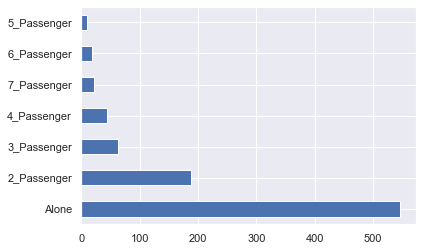

In [633]:
print(df['Categorical_Group'].value_counts().sort_index())
df['Categorical_Group'].value_counts().plot(kind='barh')

In [634]:
df.groupby('Categorical_Group')['Survived'].mean()

Categorical_Group
2_Passenger   0.574
3_Passenger   0.698
4_Passenger   0.500
5_Passenger   0.000
6_Passenger   0.000
7_Passenger   0.238
Alone         0.298
Name: Survived, dtype: float64

If the number of people in the group is in the range of [1-5], there is a positive correlation between the unique class and the target variable, but if the number of people is in the range of [6-7], there is a negative correlation between the unique class and the target variable. 

##### with_Travel

- If a passenger is traveling only with family members <br>
  
  df['Group_Size']-df['SipSp']+df['Parch']=1 should be.

- If a passenger is traveling with only friends 
  
  df['SipSp']+df['Parch']=0 ve df['Group_Size']>1 should be.

- If a passenger is traveling with family members and friends  <br>
  
  df['Group_Size']-df['SipSp']+df['Parch']>1 should be.

In [635]:
len(df[df['SibSp']+df['Parch']==df['Group_Size']])

129

In [636]:
df[df['SibSp']+df['Parch']==df['Group_Size']].sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Letter_Count,Word_Count,Adjective,Binary_Cabin,Group_Size,Categorical_Group
477,478,0,3,"Braund, Mr. Lewis Richard",male,29.000,1,0,3460,7.046,S,25,4,Mr.,0,1,Alone
423,424,0,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.000,1,1,347080,14.400,S,54,8,Mrs.,0,2,2_Passenger
743,744,0,3,"McNamee, Mr. Neal",male,24.000,1,0,376566,16.100,S,17,3,Mr.,0,1,Alone
348,349,1,3,"Coutts, Master. William Loch ""William""",male,3.000,1,1,C.A. 37671,15.900,S,38,5,Master.,0,2,2_Passenger
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.000,0,2,2653,15.742,C,27,4,Miss.,0,2,2_Passenger
405,406,0,2,"Gale, Mr. Shadrach",male,34.000,1,0,28664,21.000,S,18,3,Mr.,0,1,Alone
86,87,0,3,"Ford, Mr. William Neal",male,16.000,1,3,W./C. 6608,34.375,S,22,4,Mr.,0,4,4_Passenger
214,215,0,3,"Kiernan, Mr. Philip",male,28.000,1,0,367229,7.750,Q,19,3,Mr.,0,1,Alone
506,507,1,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.000,0,2,26360,26.000,S,45,6,Mrs.,0,2,2_Passenger
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.000,1,1,PP 9549,16.700,S,31,4,Miss.,1,2,2_Passenger


Family members may travel in the same group and have different tickets. Therefore, we need to update the Group_Size variable. 

In [637]:
dif_ticket_in_family=df[df['SibSp']+df['Parch']==df['Group_Size']].index

In [638]:
dif_ticket_in_family

Int64Index([  0,   1,   7,  10,  16,  18,  24,  38,  40,  43,
            ...
            820, 827, 852, 853, 855, 856, 861, 866, 871, 885], dtype='int64', length=129)

In [639]:
for i in dif_ticket_in_family:
    df.loc[df['Group_Size'].index==i,'Group_Size']+=1

In [640]:
len(df[df['SibSp']+df['Parch']==df['Group_Size']])

0

We should do the same operations in the Categorical_Group variable. 

In [641]:
for index,i in enumerate(df['Categorical_Group']):
    if i[0].isdigit():
        df.loc[index,'Categorical_Group']=i.replace(i[0],str(int(i[0])+1))
        

- If a passenger is traveling only with family members <br>
  
  df['Group_Size']-df['SipSp']+df['Parch']=1 should be.

- If a passenger is traveling with only friends 
  
  df['SipSp']+df['Parch']=0 ve df['Group_Size']>1 should be.

- If a passenger is traveling with family members and friends  <br>
  
  df['Group_Size']-df['SipSp']+df['Parch']>1 should be.

In [642]:
df[['SibSp','Parch','Group_Size']]

,SibSp,Parch,Group_Size
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [643]:
df['with_Travel']=df['Group_Size']-(df['SibSp']+df['Parch'])

In [644]:
df['with_Travel'].unique()

array([ 1,  2, -2, -1, -5,  5,  7,  3, -3,  4], dtype=int64)

In [645]:
negative=[i for i in df['with_Travel'].unique() if i<0]
negative

[-2, -1, -5, -3]

Family members may travel in the same group and have different tickets. Therefore, we need to update the Group_Size variable again. 

In [646]:
print(df.loc[df['with_Travel']==-5,['SibSp','Parch','Group_Size']],end='\n\n')
print(df.loc[df['with_Travel']==-3,['SibSp','Parch','Group_Size']],end='\n\n')
print(df.loc[df['with_Travel']==-2,['SibSp','Parch','Group_Size']],end='\n\n')
print(df.loc[df['with_Travel']==-1,['SibSp','Parch','Group_Size']],end='\n\n')

    SibSp  Parch  Group_Size
68      4      2           1

     SibSp  Parch  Group_Size
159      8      2           7
180      8      2           7
201      8      2           7
324      8      2           7
774      1      3           1
792      8      2           7
846      8      2           7
863      8      2           7

     SibSp  Parch  Group_Size
25       1      5           4
182      4      2           4
233      4      2           4
261      4      2           4
311      2      2           2
437      2      3           3
529      2      1           1
742      2      2           2

     SibSp  Parch  Group_Size
27       3      2           4
48       2      0           1
59       5      2           6
69       2      0           1
71       5      2           6
85       3      0           2
88       3      2           4
93       1      2           2
104      2      0           1
136      0      2           1
153      0      2           1
175      1      1           1
183      

In [647]:
df.loc[df['with_Travel']==-5,['Group_Size']]=df['SibSp']+df['Parch']+1
df.loc[df['with_Travel']==-3,['Group_Size']]=df['SibSp']+df['Parch']+1
df.loc[df['with_Travel']==-2,['Group_Size']]=df['SibSp']+df['Parch']+1
df.loc[df['with_Travel']==-1,['Group_Size']]=df['SibSp']+df['Parch']+1

In [648]:
df['with_Travel']=df['Group_Size']-(df['SibSp']+df['Parch'])

In [649]:
[i for i in df['with_Travel'].unique() if i<0]

[]

##### Family_Size 

In [650]:
df['family_size']=df['SibSp']+df['Parch']

In [651]:
df.astype({'with_Travel':'int32'})

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Letter_Count,Word_Count,Adjective,Binary_Cabin,Group_Size,Categorical_Group,with_Travel,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,S,23,4,Mr.,0,2,Alone,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C,51,7,Mrs.,1,2,Alone,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,S,22,3,Miss.,0,1,Alone,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,S,44,7,Mrs.,1,2,3_Passenger,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,S,24,4,Mr.,0,1,Alone,1,0
5,6,0,3,"Moran, Mr. James",male,28.000,0,0,330877,8.458,Q,16,3,Mr.,0,1,Alone,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000,0,0,17463,51.862,S,23,4,Mr.,1,1,Alone,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000,3,1,349909,21.075,S,30,4,Master.,0,5,5_Passenger,1,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000,0,2,347742,11.133,S,49,7,Mrs.,0,3,4_Passenger,1,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000,1,0,237736,30.071,C,35,5,Mrs.,0,2,3_Passenger,1,1


In [652]:
df['with_Travel'].unique()

array([1, 2, 5, 7, 3, 4], dtype=int64)

In [653]:
df.loc[(df['with_Travel']==1) & (df['family_size'] ==0), 'with_Travel'] = 'Alone'
df.loc[(df['with_Travel']==1) & (df['family_size'] !=0), 'with_Travel'] = 'with_family'  

In [654]:
df['with_Travel'].unique()

array(['with_family', 'Alone', 2, 5, 7, 3, 4], dtype=object)

In [655]:
for i in df['with_Travel']:
    if len(str(i))==1:
           df.loc[(df['with_Travel']==i) & (df['family_size'] !=0), 'with_Travel'] = 'with_friend_and_family'

In [656]:
for i in df['with_Travel']:
    if len(str(i))==1:
           df.loc[(df['with_Travel']==i) & (df['family_size'] ==0), 'with_Travel'] = 'with_friend'

In [657]:
df.groupby('with_Travel')['Survived'].mean()

with_Travel
Alone                    0.271
with_family              0.494
with_friend              0.507
with_friend_and_family   0.682
Name: Survived, dtype: float64

The higher the number of people in the group, the higher the survival rate. 

In [658]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Letter_Count,Word_Count,Adjective,Binary_Cabin,Group_Size,Categorical_Group,with_Travel,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,S,23,4,Mr.,0,2,Alone,with_family,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C,51,7,Mrs.,1,2,Alone,with_family,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,S,22,3,Miss.,0,1,Alone,Alone,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,S,44,7,Mrs.,1,2,3_Passenger,with_family,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,S,24,4,Mr.,0,1,Alone,Alone,0


#### Ticket 

##### Area 

In [659]:
area=set()
for i in df['Ticket']:
    if not i.isdigit():
        area.add(i.split(' ')[0])


In [660]:
area

{'A./5.',
 'A.5.',
 'A/4',
 'A/4.',
 'A/5',
 'A/5.',
 'A/S',
 'A4.',
 'C',
 'C.A.',
 'C.A./SOTON',
 'CA',
 'CA.',
 'F.C.',
 'F.C.C.',
 'Fa',
 'LINE',
 'P/PP',
 'PC',
 'PP',
 'S.C./A.4.',
 'S.C./PARIS',
 'S.O./P.P.',
 'S.O.C.',
 'S.O.P.',
 'S.P.',
 'S.W./PP',
 'SC',
 'SC/AH',
 'SC/PARIS',
 'SC/Paris',
 'SCO/W',
 'SO/C',
 'SOTON/O.Q.',
 'SOTON/O2',
 'SOTON/OQ',
 'STON/O',
 'STON/O2.',
 'SW/PP',
 'W./C.',
 'W.E.P.',
 'W/C',
 'WE/P'}

In [661]:
for index,i in enumerate(df['Ticket']):
    for j in i.split(' '):
        if j in area :
            df.loc[index,'Area']=j
df['Area'].fillna('Unknown',inplace=True)

In [662]:
df['Area'].unique()

array(['A/5', 'PC', 'STON/O2.', 'Unknown', 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)

In [663]:
df.groupby('Area')['Survived'].mean()

Area
A./5.        0.000
A.5.         0.000
A/4          0.000
A/4.         0.000
A/5          0.100
A/5.         0.143
A/S          0.000
A4.          0.000
C            0.400
C.A.         0.481
C.A./SOTON   0.000
CA           0.000
CA.          0.125
F.C.         0.000
F.C.C.       0.800
Fa           0.000
LINE         0.250
P/PP         0.500
PC           0.650
PP           0.667
S.C./A.4.    0.000
S.C./PARIS   0.500
S.O./P.P.    0.000
S.O.C.       0.000
S.O.P.       0.000
S.P.         0.000
S.W./PP      1.000
SC           1.000
SC/AH        0.667
SC/PARIS     0.400
SC/Paris     0.500
SCO/W        0.000
SO/C         1.000
SOTON/O.Q.   0.125
SOTON/O2     0.000
SOTON/OQ     0.143
STON/O       0.417
STON/O2.     0.500
SW/PP        1.000
Unknown      0.384
W./C.        0.111
W.E.P.       0.000
W/C          0.000
WE/P         0.500
Name: Survived, dtype: float64

### Creating a new variable from Numeric Variables 

In [664]:
num_cols

['Age', 'Fare']

#### Age 

##### Categorical_Sex

In [665]:
df.loc[(df['Sex'] == 'male')   &   (df['Age'] >= 0)    & (df['Age'] <= 21), 'Categorical_Sex'] = 'young_male'
df.loc[(df['Sex'] == 'female') &   (df['Age'] >= 0)    & (df['Age'] <= 21), 'Categorical_Sex'] = 'young_male'

df.loc[(df['Sex'] == 'male')   &   (df['Age'] >= 21)   & (df['Age'] <= 35), 'Categorical_Sex'] = 'adult_male'
df.loc[(df['Sex'] == 'female') &   (df['Age'] >= 21)   & (df['Age'] <= 35), 'Categorical_Sex'] = 'adult_female'

df.loc[(df['Sex'] == 'male')   &   (df['Age'] >= 36)   & (df['Age'] <= 50), 'Categorical_Sex'] = 'mature_male'
df.loc[(df['Sex'] == 'female') &   (df['Age'] >= 36)   & (df['Age'] <= 50), 'Categorical_Sex'] = 'mature_female'

df.loc[(df['Sex'] == 'male')   &   (df['Age'] >= 50)   & (df['Age'] <= df['Age'].max()), 'Categorical_Sex'] = 'senior_male'
df.loc[(df['Sex'] == 'female') &   (df['Age'] >= 50)   & (df['Age'] <= df['Age'].max()), 'Categorical_Sex'] = 'senior_female'


In [666]:
df['Categorical_Sex'].unique()

array(['adult_male', 'mature_female', 'adult_female', 'senior_male',
       'young_male', 'senior_female', 'mature_male'], dtype=object)

#### Fare 

##### Person_per_Fare 

Ticket numbers are unique, a ticket can belong to a group or to an individual.

In [667]:
df['Categorical_Sex'].unique()

array(['adult_male', 'mature_female', 'adult_female', 'senior_male',
       'young_male', 'senior_female', 'mature_male'], dtype=object)

In [668]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Letter_Count,Word_Count,Adjective,Binary_Cabin,Group_Size,Categorical_Group,with_Travel,family_size,Area,Categorical_Sex
179,180,0,3,"Leonard, Mr. Lionel",male,36.000,0,0,LINE,0.000,S,19,3,Mr.,0,4,5_Passenger,with_friend,0,LINE,mature_male
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.000,0,0,17465,25.929,S,27,4,Dr.,1,1,Alone,Alone,0,Unknown,mature_female
44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.000,0,0,330958,7.879,Q,29,4,Miss.,0,1,Alone,Alone,0,Unknown,young_male
721,722,0,3,"Jensen, Mr. Svend Lauritz",male,17.000,1,0,350048,7.054,S,25,4,Mr.,0,2,Alone,with_family,1,Unknown,young_male
418,419,0,2,"Matthews, Mr. William John",male,30.000,0,0,28228,13.000,S,26,4,Mr.,0,1,Alone,Alone,0,Unknown,adult_male
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.000,0,2,11752,26.283,S,28,4,Miss.,1,3,Alone,with_family,2,Unknown,young_male
183,184,1,2,"Becker, Master. Richard F",male,1.000,2,1,230136,39.000,S,25,4,Master.,1,4,3_Passenger,with_family,3,Unknown,young_male
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000,1,0,PC 17572,76.729,C,40,6,Mrs.,1,3,4_Passenger,with_friend_and_family,1,PC,mature_female
173,174,0,3,"Sivola, Mr. Antti Wilhelm",male,21.000,0,0,STON/O 2. 3101280,7.925,S,25,4,Mr.,0,1,Alone,Alone,0,STON/O,adult_male
501,502,0,3,"Canavan, Miss. Mary",female,21.000,0,0,364846,7.750,Q,19,3,Miss.,0,1,Alone,Alone,0,Unknown,adult_female


In [669]:
df['Fare_per_Person']=df['Fare']/df['Group_Size']

In [670]:
df['Fare_per_Person'].quantile([0,0.25,0.50,0.75,0.76,0.77,0.78,0.79
                                ,0.80,0.90,0.95,1])

0.000     0.000
0.250     7.240
0.500     8.050
0.750    14.775
0.760    15.500
0.770    18.173
0.780    25.579
0.790    26.000
0.800    26.000
0.900    34.650
0.950    45.000
1.000   221.779
Name: Fare_per_Person, dtype: float64

In [671]:
df['Fare_per_Person']=pd.cut(df['Fare_per_Person'],bins=(-1,0,
                                                         df['Fare_per_Person'].quantile(0.77),
                                                         df['Fare_per_Person'].quantile(0.95),
                                                         df['Fare_per_Person'].quantile(1)),
                             labels=['Free','Lower','Medium','Upper'])

In [672]:
df.groupby('Fare_per_Person')['Survived'].mean()

Fare_per_Person
Free     0.067
Lower    0.313
Medium   0.623
Upper    0.698
Name: Survived, dtype: float64

### Creating a new variable with interaction between variables 

#### Age_with_Pclass

In [673]:
df.groupby(['Categorical_Sex','Pclass']).agg({'Survived':'mean'}).T

Categorical_Sex adult_female             adult_male             mature_female             mature_male             senior_female             senior_male             young_male            
Pclass                     1     2     3          1     2     3             1     2     3           1     2     3             1     2     3           1     2     3          1     2     3
Survived               0.976 0.925 0.549      0.408 0.085 0.131         1.000 0.857 0.143       0.405 0.059 0.079         0.933 0.833 1.000       0.207 0.077 0.000      0.810 0.743 0.315

In [674]:
df['Age_with_Pclass']=df['Age']*df['Pclass']

# Encoding

In [675]:
cat_cols,num_cols,cat_but_car=grab_col_names(df)

Number of Observations : 891
Number of Variables    : 23
Number of Categorical Variables : 15
Number of Numerical Variables : 5
Number of Numerical but Categorical Variables : 9
Number of Categorical but Cardinal Variables : 3


In [676]:
num_cols=[i for i in num_cols if i!='PassengerId']
num_cols

['Age', 'Fare', 'Letter_Count', 'Age_with_Pclass']

### Label Encoding

In [677]:
binary_cols=[i for i in df.columns if df[i].dtypes=='O' and df[i].nunique()==2]
binary_cols

['Sex']

In [678]:
from sklearn.preprocessing import LabelEncoder 

In [679]:
lr=LabelEncoder()

In [680]:
for i in binary_cols:
    df[i]=lr.fit_transform(df[i])

### Rare Encoder

Examining the existence of unique rare classes of Categorical Variables 

In [681]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")


In [682]:
rare_analyser(df,'Survived',cat_cols)

Sex : 2
   COUNT  RATIO  TARGET_MEAN
0    314  0.352        0.742
1    577  0.648        0.189


Embarked : 3
   COUNT  RATIO  TARGET_MEAN
C    168  0.189        0.554
Q     77  0.086        0.390
S    646  0.725        0.339


Adjective : 18
           COUNT  RATIO  TARGET_MEAN
Capt.          1  0.001        0.000
Col.           2  0.002        0.500
Countess.      1  0.001        1.000
Don.           1  0.001        0.000
Dr.            7  0.008        0.429
Jonkheer.      1  0.001        0.000
L.             1  0.001        1.000
Lady.          1  0.001        1.000
Major.         2  0.002        0.500
Master.       40  0.045        0.575
Miss.        182  0.204        0.698
Mlle.          2  0.002        1.000
Mme.           1  0.001        1.000
Mr.          517  0.580        0.157
Mrs.         124  0.139        0.790
Ms.            1  0.001        1.000
Rev.           6  0.007        0.000
Sir.           1  0.001        1.000


Categorical_Group : 7
             COUNT  RATIO  TAR

If you are not carrying out a project in an industry (e.g. : health) where even small odds are of great value, it is necessary to delete rare classes.

After One Hot Encoding, a new variable is created for each class, but since the correlation between the variable created from rare classes and the target variable is at a very low level, residue occurs in the data set. 

In [683]:
def rare_encoder(dataframe, rare_perc, cat_cols):
  
    rare_columns = [col for col in cat_cols if (dataframe[col].value_counts() / len(dataframe) < 0.01).sum() > 1]

    for col in rare_columns:
        tmp = dataframe[col].value_counts() / len(dataframe)
        rare_labels = tmp[tmp < rare_perc].index
        dataframe[col] = np.where(dataframe[col].isin(rare_labels), 'Rare', dataframe[col])

    return dataframe


new_df = rare_encoder(df, 0.01, cat_cols)

In [684]:
df= rare_encoder(df, 0.01, cat_cols)

### One-Hot Encoding

In [685]:
one_hot_cols=[i for i in cat_cols if 10>=df[i].nunique()>2]
one_hot_cols

['Embarked',
 'Adjective',
 'Categorical_Group',
 'with_Travel',
 'Categorical_Sex',
 'Pclass',
 'SibSp',
 'Parch',
 'Word_Count',
 'Group_Size',
 'family_size',
 'Fare_per_Person']

In [686]:
def one_hot_encoder(dataframe,col):
    dataframe=pd.get_dummies(data=dataframe,columns=one_hot_cols,drop_first=True)
    return dataframe

In [687]:
df=one_hot_encoder(df,one_hot_cols)

In [688]:
cat_cols,num_cols,cat_but_car=grab_col_names(df)

Number of Observations : 891
Number of Variables    : 65
Number of Categorical Variables : 57
Number of Numerical Variables : 5
Number of Numerical but Categorical Variables : 57
Number of Categorical but Cardinal Variables : 3


In [689]:
num_cols=[i for i in num_cols if i!='PassengerId']

In [690]:
rare_analyser(df, "Survived", cat_cols)

Survived : 2
   COUNT  RATIO  TARGET_MEAN
0    549  0.616        0.000
1    342  0.384        1.000


Sex : 2
   COUNT  RATIO  TARGET_MEAN
0    314  0.352        0.742
1    577  0.648        0.189


Binary_Cabin : 2
   COUNT  RATIO  TARGET_MEAN
0    687  0.771        0.300
1    204  0.229        0.667


Embarked_Q : 2
   COUNT  RATIO  TARGET_MEAN
0    814  0.914        0.383
1     77  0.086        0.390


Embarked_S : 2
   COUNT  RATIO  TARGET_MEAN
0    245  0.275        0.502
1    646  0.725        0.339


Adjective_Miss. : 2
   COUNT  RATIO  TARGET_MEAN
0    709  0.796        0.303
1    182  0.204        0.698


Adjective_Mr. : 2
   COUNT  RATIO  TARGET_MEAN
0    374  0.420        0.698
1    517  0.580        0.157


Adjective_Mrs. : 2
   COUNT  RATIO  TARGET_MEAN
0    767  0.861        0.318
1    124  0.139        0.790


Adjective_Rare : 2
   COUNT  RATIO  TARGET_MEAN
0    863  0.969        0.381
1     28  0.031        0.464


Categorical_Group_4_Passenger : 2
   COUNT  RATIO  TARG

In [691]:
useless_cols = [col for col in df.columns if df[col].nunique() == 2 and
                (df[col].value_counts() / len(df) < 0.01).any(axis=None)]

# Scaling

In [692]:
from sklearn.preprocessing import StandardScaler

In [693]:
scaler=StandardScaler()
df[num_cols]=scaler.fit_transform(df[num_cols])

# Correlation Analysis 

In [694]:
corr_Series=df.corr()['Survived'].nlargest(len(df.columns))[1:]
corr_Series

Adjective_Mrs.                        0.336
Letter_Count                          0.332
Adjective_Miss.                       0.327
Binary_Cabin                          0.317
Fare                                  0.271
Fare_per_Person_Medium                0.232
Group_Size_3                          0.210
Word_Count_6                          0.202
Word_Count_7                          0.199
Categorical_Group_4_Passenger         0.178
with_Travel_with_family               0.175
Categorical_Sex_mature_female         0.173
SibSp_1                               0.173
Categorical_Sex_senior_female         0.172
family_size_1                         0.163
Fare_per_Person_Upper                 0.145
family_size_2                         0.144
Group_Size_4                          0.140
Parch_1                               0.134
family_size_3                         0.128
Group_Size_2                          0.119
with_Travel_with_friend_and_family    0.097
Pclass_2                        

# Modelling

### Creating target variables and features 

In [695]:
y = df['Survived']
X = df.drop(['Survived','Name', 'Ticket', 'Area','PassengerId'], axis=1)

### Separating the Original Data Set as a Training Set and a Test Set / Holdout Method 

In [696]:
from sklearn.model_selection import train_test_split

In [697]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

### Model Building / Training 

In [698]:
from sklearn.linear_model import LogisticRegression

In [699]:
log_model = LogisticRegression().fit(X_train, y_train)

### Creating Predicted Values

In [700]:
y_pred = log_model.predict(X_test)

### y_prob for AUC Score (probability of belonging to class 1) 


In [701]:
y_prob = log_model.predict_proba(X_test)[:, 1]
y_prob

array([0.11722299, 0.92971549, 0.04705856, 0.14073937, 0.94571001,
       0.18276434, 0.09315823, 0.14056289, 0.08186551, 0.75538985,
       0.66978567, 0.14881992, 0.29420226, 0.06211542, 0.66883536,
       0.08133875, 0.51085756, 0.07502603, 0.95068396, 0.18309927,
       0.45044006, 0.09341255, 0.54124463, 0.0499198 , 0.96481814,
       0.40991218, 0.62772605, 0.53106016, 0.08774804, 0.03666772,
       0.16859498, 0.06229875, 0.10057428, 0.61492434, 0.44593642,
       0.5510402 , 0.00837323, 0.76606633, 0.10215342, 0.56523908,
       0.67186985, 0.15433571, 0.66528116, 0.40950574, 0.53229805,
       0.1630061 , 0.31351631, 0.89191813, 0.87619894, 0.13608681,
       0.98175965, 0.8587666 , 0.143341  , 0.11931898, 0.05357643,
       0.94633487, 0.09156456, 0.01489439, 0.07849188, 0.1177594 ,
       0.69849736, 0.11789366, 0.5471495 , 0.70684703, 0.95084865,
       0.88627857, 0.84459256, 0.05060521, 0.24871477, 0.06432971,
       0.65571805, 0.06431559, 0.07520468, 0.47296736, 0.22999

### Classification Report

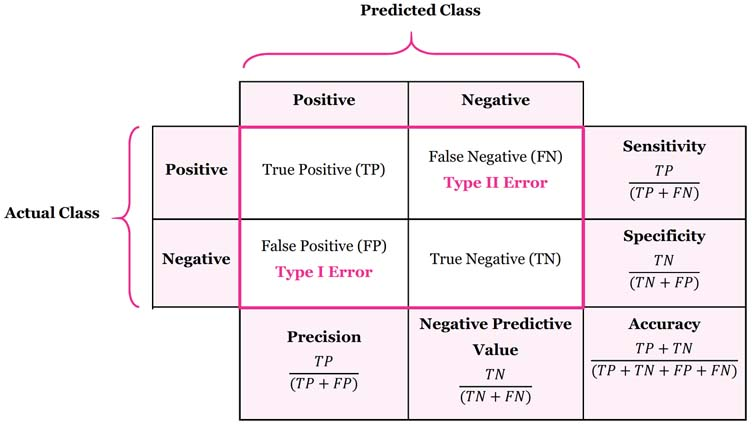

In [702]:
Image("Confusion Matrix.jpg")


- **precision** : The success rate of positive class predictions.
- **recall**    : It is the rate of correctly guessing the positive class.
- **f1**:      It is a harmonic average created with Precision and Recall.
- **accuracy**  : The rate at which the target variable is expressed with features. 

In [703]:
from sklearn.metrics import classification_report

In [704]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       157
           1       0.76      0.70      0.73       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



### ROC Curve

If the area under the curve increases (AUC-->Area Under Curve), the accuracy score increases. 

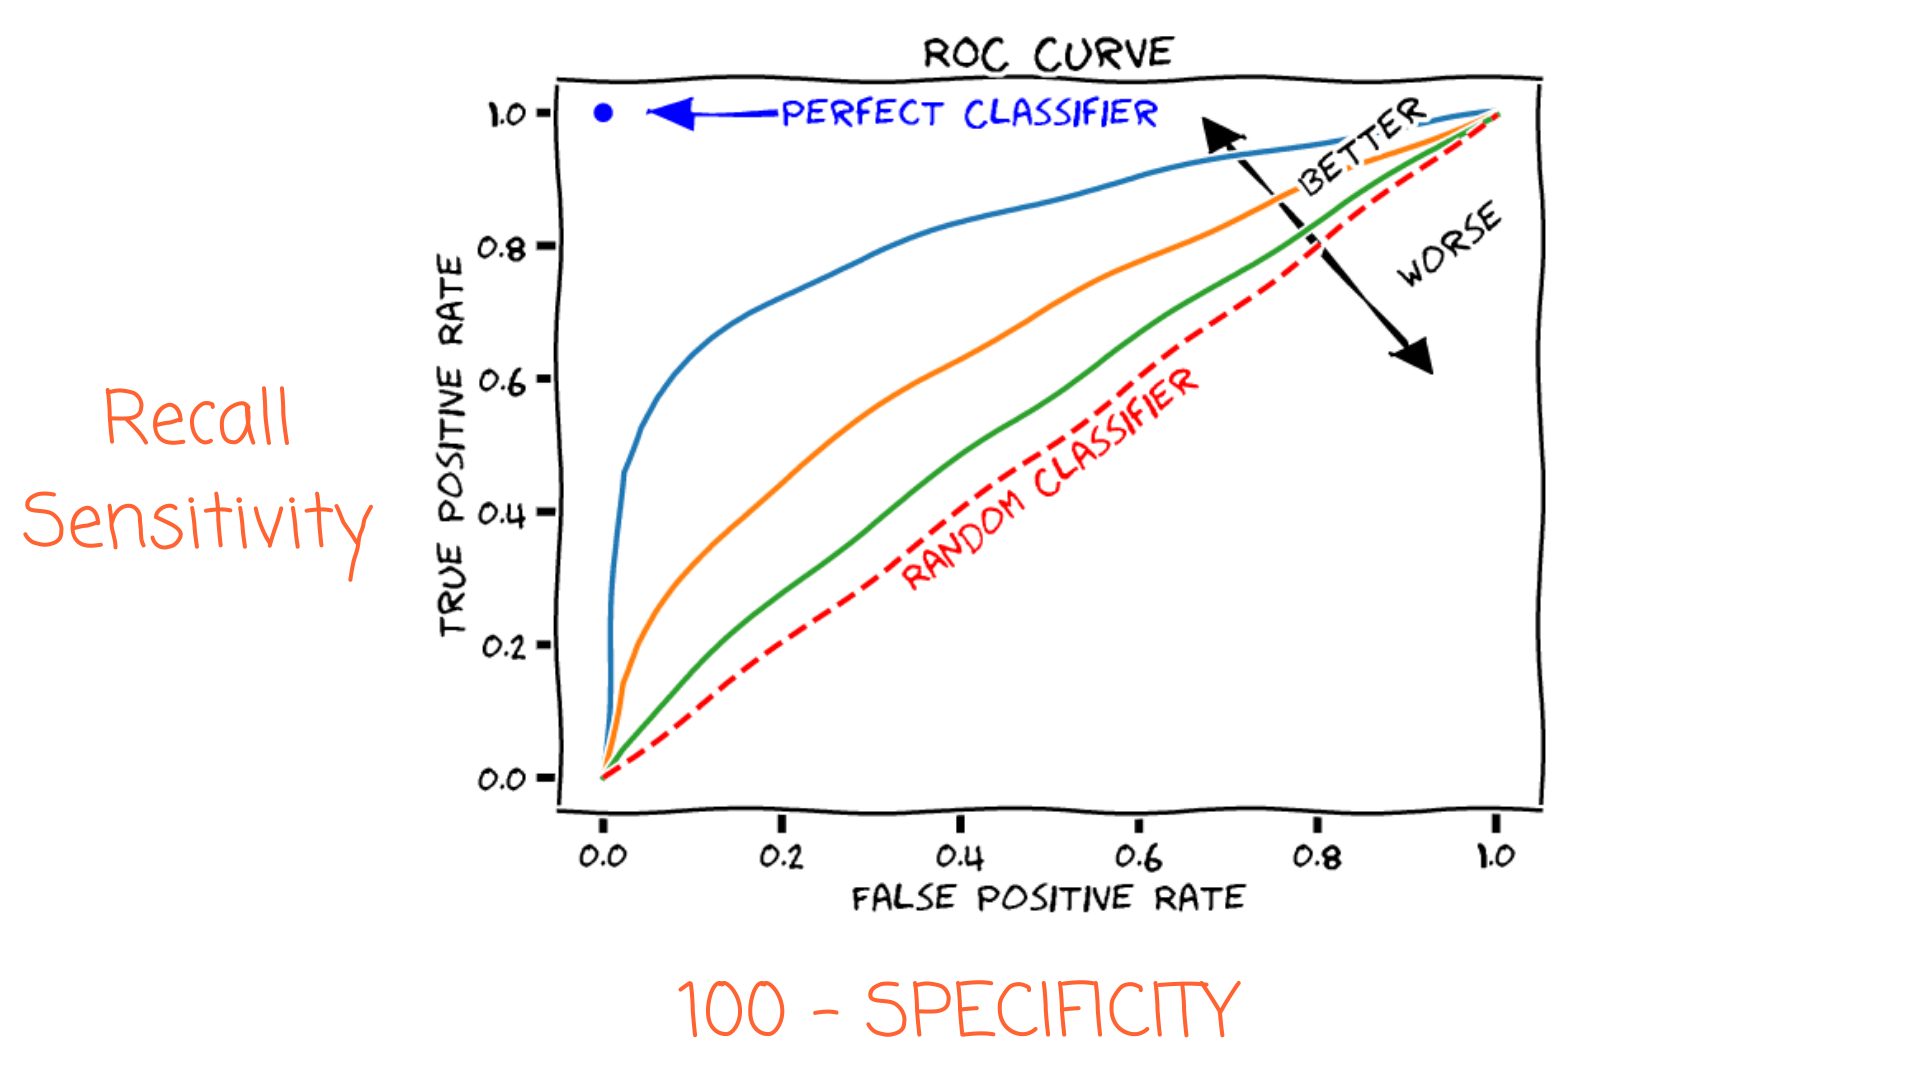

In [705]:
Image('Recall_Sensitivity .png')

In [706]:
from sklearn.metrics import plot_roc_curve,roc_auc_score

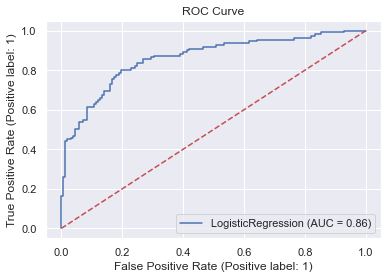

0.8615366959316004

In [707]:
plot_roc_curve(log_model, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

roc_auc_score(y_test, y_prob)

### k-fold cross validation 

In [708]:
from sklearn.model_selection import cross_validate

In [709]:
cv_results = cross_validate(log_model,
                            X, y,
                            cv=5,
                            scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

In [710]:
print('accuracy : ',cv_results['test_accuracy'].mean(),end='\n\n')
print('precision: ',cv_results['test_precision'].mean(),end='\n\n')
print('recall   : ',cv_results['test_recall'].mean(),end='\n\n')
print('test_f1  : ',cv_results['test_f1'].mean(),end='\n\n')
print('roc_auc  : ',cv_results['test_roc_auc'].mean(),end='\n\n')

accuracy :  0.8237838177138912

precision:  0.7828086838534599

recall   :  0.748380221653879

test_f1  :  0.7649086877702989

roc_auc  :  0.8730101668981043



### Features Importances

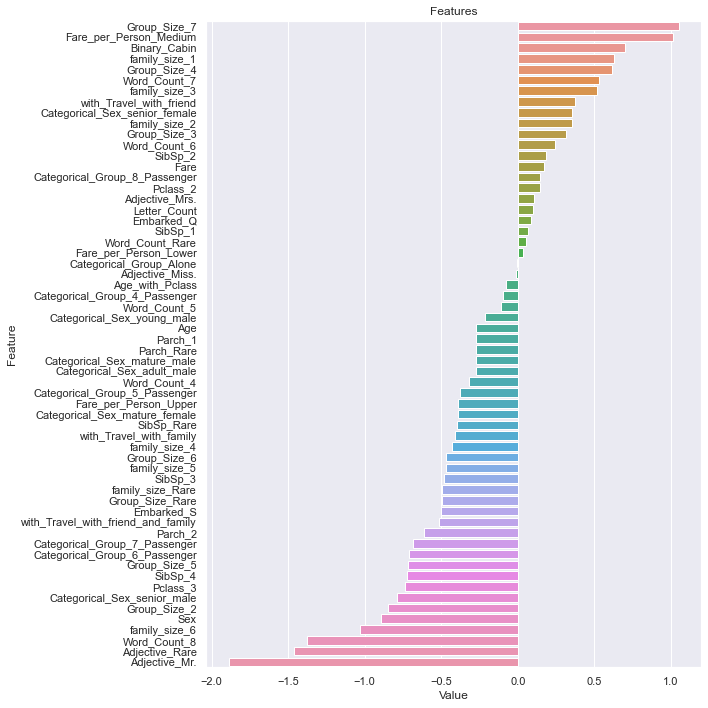

In [711]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({"Value":model.coef_[0], 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(log_model,X_train)

### **If you want to interact with me**

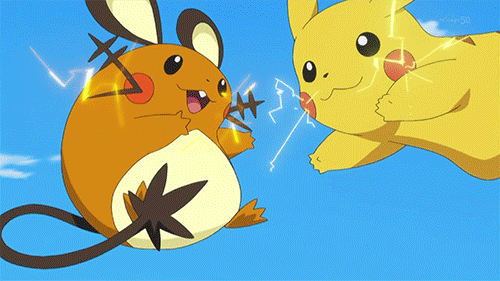

**My LinkedIn Address** :

<a href="https://www.linkedin.com/in/ibrahim-turkoglu/">LinkedIn</a>

**My Medium   Address** :

<a href="https://medium.com/@trkglu.ibrahim">Medium</a>

**My Github   Address** :

<a href="https://github.com/ibrahimturkoglu">Github</a>

**My Kaggle  Address** :

<a href="https://www.kaggle.com/brahimtrkolu">Kaggle</a>